# Configuración entorno y Pre procesamiento datos

In [2]:
# ==============================================================================
# SCRIPT DE PREPROCESAMIENTO DE DATOS - IMS BEARING DATASET
# ==============================================================================
# Objetivo:
# 1. Cargar los datos de vibración del Rodamiento 3 del '1st_test'.
# 2. Concatenar los datos en una única serie de tiempo.
# 3. Calcular y normalizar el Tiempo Restante de Vida Útil (RUL).
# 4. Generar secuencias de datos (ventanas deslizantes) para el entrenamiento.
# 5. Convertir los datos a tensores de PyTorch.
# ==============================================================================

import os
import numpy as np
import pandas as pd
import torch
from google.colab import drive
from tqdm import tqdm # Para barras de progreso visuales

##Montaje Google Drive + carga de archivos

In [3]:
# 1. CONFIGURACIÓN Y MONTAJE DE GOOGLE DRIVE
# ==============================================================================
print("Paso 1: Montando Google Drive...")
drive.mount('/content/drive')

Paso 1: Montando Google Drive...
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
# Listamos los archivos dentro de la carpeta para confirmar.
# # try:
#     all_files = sorted(os.listdir(DATA_FOLDER_PATH))
#     print(f"¡Éxito! Se encontraron {len(all_files)} archivos en la carpeta.")
#     print("\nAquí tienes una muestra de los primeros 5 archivos:")
#     print(all_files[:5])
# except FileNotFoundError:
#     print(f"❌ Error: No se pudo encontrar la carpeta en la ruta: {DATA_FOLDER_PATH}")

## Lectura de archivos, ordenado y concatenación

In [4]:
# --- PARÁMETROS DE CONFIGURACIÓN ---
# El rodamiento 3 corresponde a las columnas 4 y 5. Usaremos la primera (índice 4).
# Recordatorio de índices: B1(0,1), B2(2,3), B3(4,5), B4(6,7)
TARGET_BEARING_COLUMN = 4
# Longitud de la secuencia (ventana) que alimentará al modelo.
SEQUENCE_LENGTH = 2561

In [7]:
# ==============================================================================
# 2. LECTURA, ORDENADO Y CONCATENACIÓN DE DATOS
# ==============================================================================
# print("\nPaso 2: Leyendo y concatenando los datos...")

# # Obtenemos la lista de archivos y la ordenamos cronológicamente.
# # La estructura de nombres (YYYY.MM.DD.HH.MM.SS) permite un ordenado simple.
# all_files = sorted(os.listdir(DATA_FOLDER_PATH))
# total_files = len(all_files)


In [8]:
# all_files[2154]

In [9]:
# # Lista para almacenar los datos del rodamiento seleccionado de cada archivo.
# bearing_data_list = []
# # Usamos tqdm para ver el progreso, ya que leer 2156 archivos toma un momento.
# for filename in tqdm(all_files, desc="Procesando archivos"):
#     # Construimos la ruta completa al archivo
#     filepath = os.path.join(DATA_FOLDER_PATH, filename)

#     # Leemos el archivo usando pandas. Es rápido y eficiente.
#     # Los datos están separados por tabulaciones ('\t').
#     df = pd.read_csv(filepath, sep='\t', header=None)

#     # Extraemos la columna del rodamiento de interés como un array de NumPy.
#     bearing_column_data = df[TARGET_BEARING_COLUMN].values

#     # Lo añadimos a nuestra lista.
#     bearing_data_list.append(bearing_column_data)

# # Concatenamos todos los arrays de la lista en una única serie de tiempo gigante.
# concatenated_data = np.concatenate(bearing_data_list)

# print(f"\n¡Concatenación completa!")
# print(f"Shape de la serie de tiempo final: {concatenated_data.shape}")

## Etiquetado de RUL + Normalización

In [10]:
# ==============================================================================
# 3. ETIQUETADO DEL RUL (Remaining Useful Life)
# ==============================================================================
# print("\nPaso 3: Calculando y normalizando el RUL...")

# # Cada archivo representa un "ciclo". El RUL se calcula en ciclos restantes.
# points_per_file = concatenated_data.shape[0] // total_files # Debería ser 20480

# # Creamos un array que va desde (total_files - 1) hasta 0.
# # Este es el RUL en "ciclos" para cada archivo.
# rul_per_cycle = np.arange(total_files - 1, -1, -1)

# # Repetimos el valor de RUL de cada ciclo para cada punto de datos en ese ciclo.
# rul_points = np.repeat(rul_per_cycle, points_per_file)

# # Normalizamos el RUL a un rango de [0, 1].
# # El RUL máximo es el del primer ciclo (total_files - 1).
# rul_normalized = rul_points / (total_files - 1)

# print(f"¡Cálculo de RUL completo!")
# print(f"Shape del array de RUL: {rul_normalized.shape}")
# print(f"Ejemplo de RUL normalizado (primeros 5 valores): {rul_normalized[:5]}")
# print(f"Ejemplo de RUL normalizado (últimos 5 valores): {rul_normalized[-5:]}")



In [11]:
# rul_per_cycle

In [12]:
# points_per_file

In [13]:
# rul_points.shape

In [14]:
# rul_normalized

In [15]:
# concatenated_data

In [16]:
# --- GUARDAR CHECKPOINT ---
# print("Guardando los datos procesados para uso futuro...")

# # Define las rutas donde quieres guardar los archivos en tu Drive
# save_path_data = '/content/drive/MyDrive/TP_Deeplearning/processed_data.npy'
# save_path_rul = '/content/drive/MyDrive/TP_Deeplearning/processed_rul.npy'

# # Guarda los arrays de NumPy
# np.save(save_path_data, concatenated_data)
# np.save(save_path_rul, rul_normalized)

# print(f"Datos guardados en: {save_path_data}")
# print(f"RUL guardado en: {save_path_rul}")

## Checkpoint - Carga de datos Preprocesados [Obligatorio]

In [19]:
# --- CARGAR CHECKPOINT ---
print("Cargando datos preprocesados desde el checkpoint...")

# Define las rutas a tus archivos guardados
load_path_data = '/content/drive/MyDrive/TP_Deeplearning/processed_data.npy'
load_path_rul = '/content/drive/MyDrive/TP_Deeplearning/processed_rul.npy'

# Carga los arrays
concatenated_data = np.load(load_path_data)
rul_normalized = np.load(load_path_rul)

print("¡Datos cargados exitosamente desde el checkpoint!")
print(f"Shape de la serie de tiempo cargada: {concatenated_data.shape}")
print(f"Shape del RUL cargado: {rul_normalized.shape}")

Cargando datos preprocesados desde el checkpoint...
¡Datos cargados exitosamente desde el checkpoint!
Shape de la serie de tiempo cargada: (44134400,)
Shape del RUL cargado: (44134400,)


## Generación de Sliding Windows

In [27]:
# ==============================================================================
# 4. GENERACIÓN DE SECUENCIAS (SLIDING WINDOW) - AHORA CON DATASET
# ==============================================================================
print("\nPaso 4: Preparando para la generación de secuencias con un Dataset de PyTorch.")
print("La creación de secuencias se hará eficientemente durante el entrenamiento.")

# Calculamos el número total de secuencias que se pueden crear.
# Esta variable la usaremos en nuestro Dataset.
num_sequences = len(concatenated_data) - SEQUENCE_LENGTH

print(f"Se podrán generar un total de {num_sequences} secuencias.")


Paso 4: Preparando para la generación de secuencias con un Dataset de PyTorch.
La creación de secuencias se hará eficientemente durante el entrenamiento.
Se podrán generar un total de 44131839 secuencias.


## Creación de Dataset Full para entrenar modelos

In [28]:
from torch.utils.data import Dataset

class BearingDataset(Dataset):
    """
    Dataset personalizado para generar secuencias de datos de rodamientos al vuelo.
    Esto evita cargar todas las secuencias en la RAM a la vez.
    """
    def __init__(self, data, targets, sequence_length):
        self.data = torch.tensor(data, dtype=torch.float32)
        self.targets = torch.tensor(targets, dtype=torch.float32)
        self.sequence_length = sequence_length
        self.num_sequences = len(data) - sequence_length

    def __len__(self):
        # Devuelve el número total de secuencias que se pueden generar.
        return self.num_sequences

    def __getitem__(self, idx):
        # Obtiene una única secuencia y su etiqueta.
        # Esto se llama cada vez que el DataLoader pide una muestra.

        # La secuencia de datos de vibración.
        sequence = self.data[idx : idx + self.sequence_length]

        # La etiqueta RUL corresponde al ÚLTIMO punto de la secuencia.
        label = self.targets[idx + self.sequence_length - 1]

        # Añadimos una dimensión de "feature" para que sea compatible con la LSTM.
        # Shape: (sequence_length, 1)
        sequence = sequence.unsqueeze(1)

        return sequence, label

# --- Instanciamos el Dataset ---
print("Creando la instancia del BearingDataset...")
full_dataset = BearingDataset(
    data=concatenated_data,
    targets=rul_normalized,
    sequence_length=SEQUENCE_LENGTH
)

print(f"¡Dataset creado exitosamente!")
print(f"Número de secuencias disponibles en el dataset: {len(full_dataset)}")

# Ejemplo: obtener la primera secuencia del dataset
sample_sequence, sample_label = full_dataset[0]
print(f"Shape de una secuencia de ejemplo: {sample_sequence.shape}")
print(f"Etiqueta de una secuencia de ejemplo: {sample_label}")

#El `BearingDataset` creado contiene todos los datos y los servirá
# en el formato correcto (secuencias 3D y etiquetas) al DataLoader durante el entrenamiento.

Creando la instancia del BearingDataset...
¡Dataset creado exitosamente!
Número de secuencias disponibles en el dataset: 44131839
Shape de una secuencia de ejemplo: torch.Size([2561, 1])
Etiqueta de una secuencia de ejemplo: 1.0


## Creación de Subset de datos [Sampled dataset] para entrenar

Debemos hacer un "Sampled dataset" debido a que el volumen de datos es demasiado grande para procesar incluso para la GPU A-100 en google colab y demanda demasiada cantidad de horas  

In [29]:
from torch.utils.data import Subset
from sklearn.model_selection import StratifiedShuffleSplit
import numpy as np

# ==============================================================================
# 🌟 OPCIONAL: MUESTREO ESTRATIFICADO PARA UN ENTRENAMIENTO MÁS RÁPIDO Y FIEL
# ==============================================================================
# Porcentaje del dataset que queremos usar (ej. 10%)
SAMPLE_FRACTION = 0.1

print("Iniciando muestreo estratificado...")

# 1. Crear estratos basados en el RUL.
# Para hacer esto, necesitamos una etiqueta de RUL por cada secuencia, no por cada punto.
# Usaremos el RUL al final de cada secuencia como la etiqueta para esa secuencia.
rul_of_sequences = rul_normalized[SEQUENCE_LENGTH:]

# Creamos "bins" o categorías para el RUL. Multiplicamos por 10 y redondeamos
# para tener 10 categorías (0-1, 1-2, ..., 9-10). Esto sirve como nuestra 'y' para la estratificación.
# Usamos np.ceil para evitar tener un bin 0 que podría tener muy pocas muestras.
strata = np.ceil(rul_of_sequences * 10)

# 2. Usar StratifiedShuffleSplit
# n_splits=1 porque solo necesitamos una división.
# test_size es el complemento de la fracción que queremos, es decir, lo que descartamos.
sss = StratifiedShuffleSplit(n_splits=1, test_size=1 - SAMPLE_FRACTION, random_state=42)

# sss.split devuelve los índices de entrenamiento y prueba. Solo necesitamos los de 'entrenamiento' (nuestra muestra).
# El primer generador de la tupla es el que nos interesa
train_indices, _ = next(sss.split(np.zeros(len(strata)), strata))

# 3. Crear el Subset de PyTorch con los índices estratificados
sampled_dataset = Subset(full_dataset, train_indices)

print(f"\nDataset original: {len(full_dataset)} secuencias.")
print(f"Dataset de muestra estratificado ({SAMPLE_FRACTION*100}%): {len(sampled_dataset)} secuencias.")
print("La muestra estratificada ahora tiene una distribución de RUL representativa del dataset completo.")

# Para el resto del notebook, usaremos 'sampled_dataset'

Iniciando muestreo estratificado...

Dataset original: 44131839 secuencias.
Dataset de muestra estratificado (10.0%): 4413183 secuencias.
La muestra estratificada ahora tiene una distribución de RUL representativa del dataset completo.


# Modelo Base - LSTM

## Arquitectura LSTM - Modelo Benchmark

In [10]:
import torch
import torch.nn as nn

# ==============================================================================
# 6. DEFINICIÓN DEL MODELO LSTM
# ==============================================================================

class RUL_LSTM(nn.Module):
    """
    Arquitectura del modelo LSTM para la predicción de RUL.
    """
    def __init__(self, input_size, hidden_size, num_layers, output_size, dropout_prob=0.5):
        super(RUL_LSTM, self).__init__()

        self.hidden_size = hidden_size
        self.num_layers = num_layers

        # Capa LSTM
        # batch_first=True hace que los tensores de entrada/salida sean (batch, seq, feature)
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True)

        # Capa de Dropout para regularización
        self.dropout = nn.Dropout(dropout_prob)

        # Capa lineal para mapear la salida de la LSTM a la predicción final
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        # Inicializar el estado oculto y el estado de celda con ceros
        # h0 y c0 tendrán shape (num_layers, batch_size, hidden_size)
        h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(x.device)
        c0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(x.device)

        # Forward pass a través de la LSTM
        # out tendrá shape (batch_size, seq_length, hidden_size)
        out, _ = self.lstm(x, (h0, c0))

        # Usamos solo la salida del último paso de tiempo para la predicción
        # out[:, -1, :] tiene shape (batch_size, hidden_size)
        out = self.dropout(out[:, -1, :])

        # Pasamos la salida por la capa lineal final
        out = self.fc(out)

        return out

# --- Hiperparámetros del Modelo ---
INPUT_SIZE = 1         # Solo tenemos una característica (el valor de vibración)
HIDDEN_SIZE = 128      # Número de neuronas en la capa oculta de la LSTM
NUM_LAYERS = 2         # Número de capas LSTM apiladas
OUTPUT_SIZE = 1        # Solo predecimos un valor (el RUL)
DROPOUT_PROB = 0.5

# --- Instanciación del Modelo, Pérdida y Optimizador ---

# Mover el modelo a la GPU si está disponible
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Usando el dispositivo: {device}")

model = RUL_LSTM(INPUT_SIZE, HIDDEN_SIZE, NUM_LAYERS, OUTPUT_SIZE, DROPOUT_PROB).to(device)

# Función de pérdida para regresión
criterion = nn.MSELoss()

# Optimizador
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

print("\nArquitectura del Modelo:")
print(model)

print("\n==============================================================================")
print("✅ Modelo, función de pérdida y optimizador listos.")
print("El siguiente paso es crear los DataLoaders y el bucle de entrenamiento.")
print("==============================================================================")

Usando el dispositivo: cuda

Arquitectura del Modelo:
RUL_LSTM(
  (lstm): LSTM(1, 128, num_layers=2, batch_first=True)
  (dropout): Dropout(p=0.5, inplace=False)
  (fc): Linear(in_features=128, out_features=1, bias=True)
)

✅ Modelo, función de pérdida y optimizador listos.
El siguiente paso es crear los DataLoaders y el bucle de entrenamiento.


## Entrenamiento LSTM

Creación

In [30]:
from torch.utils.data import DataLoader, random_split
from torch.cuda.amp import autocast, GradScaler # Para precisión mixta

# ==============================================================================
# 7. CREACIÓN DE DATALOADERS Y BUCLE DE ENTRENAMIENTO (VERSIÓN ACELERADA)
# ==============================================================================

# --- Parámetros de Entrenamiento (Ajustados) ---
# Se reduce el BATCH_SIZE para evitar errores de memoria (Out of Memory)
BATCH_SIZE = 512
NUM_EPOCHS = 5
VALIDATION_SPLIT = 0.2

# --- Usamos el dataset muestreado ---
dataset_to_use = sampled_dataset # O cambia a full_dataset si quieres entrenar con todo
# ---

dataset_size = len(dataset_to_use)
val_size = int(VALIDATION_SPLIT * dataset_size)
train_size = dataset_size - val_size

train_dataset, val_dataset = random_split(dataset_to_use, [train_size, val_size])

print(f"Tamaño del dataset de entrenamiento: {len(train_dataset)}")
print(f"Tamaño del dataset de validación: {len(val_dataset)}")

train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True, num_workers=2, pin_memory=True)
val_loader = DataLoader(val_dataset, batch_size=BATCH_SIZE, shuffle=False, num_workers=2, pin_memory=True)

# --- Bucle de Entrenamiento con Precisión Mixta ---
print("\nIniciando el entrenamiento acelerado...")
history = {'train_loss': [], 'val_loss': []}

# Inicializa el GradScaler para la precisión mixta
scaler = GradScaler()

for epoch in range(NUM_EPOCHS):
    model.train()
    total_train_loss = 0.0

    for sequences, labels in tqdm(train_loader, desc=f"Epoch {epoch+1}/{NUM_EPOCHS} [Entrenamiento]"):
        sequences, labels = sequences.to(device), labels.to(device)
        optimizer.zero_grad()

        # autocast ejecuta el forward pass en precisión mixta
        with autocast():
            outputs = model(sequences)
            loss = criterion(outputs, labels.unsqueeze(1))

        # scaler.scale escala la pérdida para evitar underflow de gradientes
        scaler.scale(loss).backward()
        # scaler.step desescala los gradientes y actualiza los pesos
        scaler.step(optimizer)
        # scaler.update prepara el scaler para la siguiente iteración
        scaler.update()

        total_train_loss += loss.item()

    avg_train_loss = total_train_loss / len(train_loader)
    history['train_loss'].append(avg_train_loss)

    # --- Fase de Validación ---
    model.eval()
    total_val_loss = 0.0
    with torch.no_grad():
        for sequences, labels in tqdm(val_loader, desc=f"Epoch {epoch+1}/{NUM_EPOCHS} [Validación]"):
            sequences, labels = sequences.to(device), labels.to(device)
            with autocast():
                outputs = model(sequences)
                loss = criterion(outputs, labels.unsqueeze(1))
            total_val_loss += loss.item()

    avg_val_loss = total_val_loss / len(val_loader)
    history['val_loss'].append(avg_val_loss)

    print(f"Epoch [{epoch+1}/{NUM_EPOCHS}], "
          f"Pérdida de Entrenamiento: {avg_train_loss:.4f}, "
          f"Pérdida de Validación: {avg_val_loss:.4f}")

print("\n==============================================================================")
print("✅ Entrenamiento finalizado.")
print("==============================================================================")

Tamaño del dataset de entrenamiento: 3530547
Tamaño del dataset de validación: 882636

Iniciando el entrenamiento acelerado...


/tmp/ipython-input-3407305219.py:35: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  scaler = GradScaler()


NameError: name 'model' is not defined

In [26]:
# import json

# ==============================================================================
# 8. GUARDAR MODELO E HISTORIAL
# ==============================================================================
# print("\nGuardando el modelo y el historial de entrenamiento...")

# # --- Definir Rutas de Guardado en Google Drive ---
# MODEL_SAVE_PATH = '/content/drive/MyDrive/TP_Deeplearning/rul_lstm_model_reducido.pth'
# HISTORY_SAVE_PATH = '/content/drive/MyDrive/TP_Deeplearning/training_history_reducido.json'

# # --- Guardar el Estado del Modelo ---
# # Se guarda solo el "state_dict", que contiene los pesos y sesgos aprendidos.
# # Es la forma recomendada y más flexible de guardar modelos en PyTorch.
# torch.save(model.state_dict(), MODEL_SAVE_PATH)
# print(f"Modelo guardado en: {MODEL_SAVE_PATH}")

# # --- Guardar el Historial de Entrenamiento ---
# # Guardamos el diccionario 'history' en un archivo JSON para poder graficarlo luego.
# with open(HISTORY_SAVE_PATH, 'w') as f:
#     json.dump(history, f)
# print(f"Historial de entrenamiento guardado en: {HISTORY_SAVE_PATH}")

# # --- Cómo Cargarlos en el Futuro ---
# print("\n--- Para cargar en el futuro ---")
# print("1. Re-crea la arquitectura del modelo: model = RUL_LSTM(...)")
# print("2. Carga los pesos: model.load_state_dict(torch.load(MODEL_SAVE_PATH))")
# print("3. Pon el modelo en modo de evaluación: model.eval()")

## Checkpoint Model - Carga modelo LSTM Pre Entrenado y su historial

Necesita previamente correr la celda de arquitectura de la LSTM

In [12]:
import torch
import json # Importamos la librería para manejar JSON

# ==============================================================================
# CARGAR UN MODELO PRE-ENTRENADO Y SU HISTORIAL
# ==============================================================================

print("Cargando el modelo entrenado y el historial desde los archivos...")

# --- 1. Recrear la Arquitectura del Modelo ---
# Debes usar los mismos hiperparámetros con los que se guardó el modelo.
model_loaded = RUL_LSTM(INPUT_SIZE, HIDDEN_SIZE, NUM_LAYERS, OUTPUT_SIZE, DROPOUT_PROB)
print("Arquitectura del modelo recreada.")

# --- 2. Definir las Rutas a los Archivos Guardados ---
MODEL_LOAD_PATH = '/content/drive/MyDrive/TP_Deeplearning/rul_lstm_model_reducido.pth'
HISTORY_LOAD_PATH = '/content/drive/MyDrive/TP_Deeplearning/training_history_reducido.json'

# --- 3. Cargar los Pesos del Modelo (state_dict) ---
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model_loaded.load_state_dict(torch.load(MODEL_LOAD_PATH, map_location=device))
print(f"Pesos cargados desde: {MODEL_LOAD_PATH}")

# --- 4. Mover el Modelo al Dispositivo y Ponerlo en Modo Evaluación ---
model_loaded.to(device)
model_loaded.eval() # ¡Paso crítico para la inferencia!

# --- 5. Cargar el Historial de Entrenamiento ---
with open(HISTORY_LOAD_PATH, 'r') as f:
    history_loaded = json.load(f)
print(f"Historial de entrenamiento cargado desde: {HISTORY_LOAD_PATH}")


print(f"\n✅ ¡Modelo y historial cargados exitosamente!")
print(f"El modelo está en el dispositivo '{device}' y listo para predecir.")
print(f"El historial contiene las siguientes claves: {list(history_loaded.keys())}")

Cargando el modelo entrenado y el historial desde los archivos...
Arquitectura del modelo recreada.
Pesos cargados desde: /content/drive/MyDrive/TP_Deeplearning/rul_lstm_model_reducido.pth
Historial de entrenamiento cargado desde: /content/drive/MyDrive/TP_Deeplearning/training_history_reducido.json

✅ ¡Modelo y historial cargados exitosamente!
El modelo está en el dispositivo 'cuda' y listo para predecir.
El historial contiene las siguientes claves: ['train_loss', 'val_loss']


## Resultados Entrenamiento y Validación LSTM

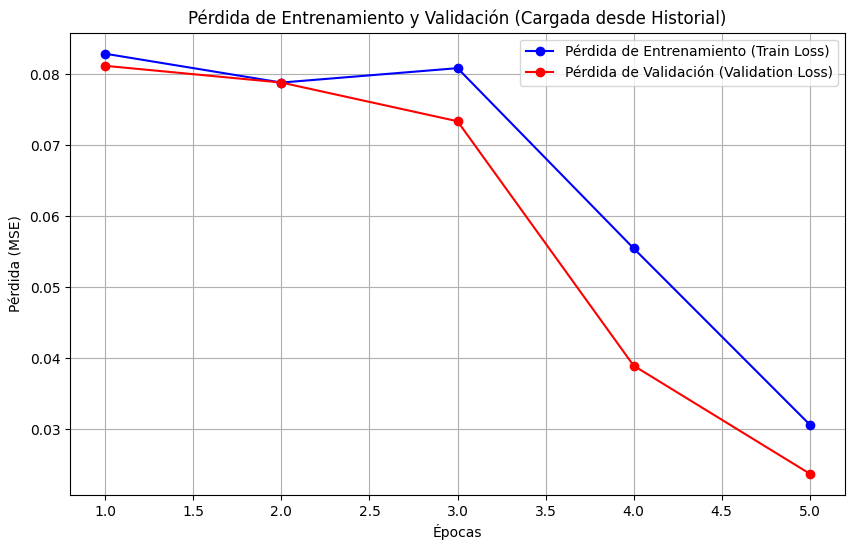

In [13]:
import matplotlib.pyplot as plt

# ==============================================================================
# 9. VISUALIZACIÓN DE LOS RESULTADOS DEL ENTRENAMIENTO (DESDE EL HISTORIAL CARGADO)
# ==============================================================================

# Extraemos las listas de pérdidas del diccionario 'history_loaded'
train_loss = history_loaded['train_loss']
val_loss = history_loaded['val_loss']

# Creamos un rango de épocas para el eje X
epochs = range(1, len(train_loss) + 1)

# Creamos la figura y los ejes para el gráfico
plt.figure(figsize=(10, 6))

# Trazamos la curva de pérdida de entrenamiento
plt.plot(epochs, train_loss, 'b-o', label='Pérdida de Entrenamiento (Train Loss)')

# Trazamos la curva de pérdida de validación
plt.plot(epochs, val_loss, 'r-o', label='Pérdida de Validación (Validation Loss)')

# Añadimos títulos y etiquetas para mayor claridad
plt.title('Pérdida de Entrenamiento y Validación (Cargada desde Historial)')
plt.xlabel('Epochs')
plt.ylabel('Pérdida (MSE)')

# Añadimos una leyenda para identificar cada curva
plt.legend()

# Añadimos una cuadrícula para facilitar la lectura de los valores
plt.grid(True)

# Mostramos el gráfico
plt.show()

**El Modelo Está Aprendiendo Correctamente**

La tendencia general de ambas curvas (entrenamiento y validación) es descendente, lo cual es la señal más importante de que el modelo está aprendiendo a minimizar el error y a hacer predicciones cada vez más precisas.
No Hay Signos de Overfitting:

Las curvas de entrenamiento y validación están muy juntas y siguen una trayectoria similar. El overfitting ocurriría si la pérdida de entrenamiento continuara bajando mientras que la de validación comenzara a subir. El hecho de que esto no suceda indica que el modelo está generalizando bien a los datos que no ha visto durante el entrenamiento.

La pérdida de Validación es ligeramente mejor que la de entrenamiento, y esto se debe a cierta aleatoriedad que ocurre en el entrenamiento en base a sus hiperparámetros como es el dropout que apaga neuronas al azar para forzar al modelo a ser más robusto lo que puede generar más perdida en el entrenamiento mientras que en la validación el modelo las neuronas están todas activas.

**Posibles mejoras con más epochs:**

Al final del 5to epoch, ambas curvas todavía muestran una clara tendencia a la baja. Esto sugiere que el modelo no ha alcanzado su punto de convergencia o su mínimo de pérdida y que probablemente mejoraría aún más si se entrenara durante más epochs hasta que las curvas comiencen a aplanarse.


En términos generales el resultado es muy bueno y prometedor quedando como próximos pasos:

- En caso de tener todos los recursos correr el Dataset Full
- Aumentar el número de épochs para entrenar durante más tiempo y ver si se reduce aún más la pérdida.


## Predicción con LSTM

In [14]:
import torch
from torch.utils.data import DataLoader

# ==============================================================================
# 10. REALIZAR PREDICCIONES CON EL MODELO ENTRENADO
# ==============================================================================

# --- 1. Cargar el Modelo Guardado ---
print("Cargando el modelo entrenado...")
# Primero, recreamos la arquitectura del modelo con los mismos hiperparámetros
model_loaded = RUL_LSTM(INPUT_SIZE, HIDDEN_SIZE, NUM_LAYERS, OUTPUT_SIZE, DROPOUT_PROB)

# Luego, cargamos los pesos guardados desde el archivo .pth
MODEL_SAVE_PATH = '/content/drive/MyDrive/TP_Deeplearning/rul_lstm_model_reducido.pth'
model_loaded.load_state_dict(torch.load(MODEL_SAVE_PATH))

# Movemos el modelo a la GPU y lo ponemos en modo de evaluación
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model_loaded.to(device)
model_loaded.eval()
print("¡Modelo cargado y en modo de evaluación!")


# --- 2. Obtener un Lote de Datos para Probar (con BATCH_SIZE reducido) ---
print("\nObteniendo un lote de datos del conjunto de validación...")
# Para evitar errores de memoria en la predicción, creamos un DataLoader temporal
# con un BATCH_SIZE más pequeño solo para esta celda.
prediction_loader = DataLoader(val_dataset, batch_size=64, shuffle=True)
val_sequences, val_labels = next(iter(prediction_loader))

# Movemos el lote a la GPU
val_sequences = val_sequences.to(device)


# --- 3. Realizar Predicciones ---
print("Realizando predicciones...")
with torch.no_grad(): # No necesitamos gradientes para predecir
    predictions = model_loaded(val_sequences)

# Las predicciones salen de la GPU. Las movemos a la CPU y las convertimos a un array de NumPy
predictions = predictions.cpu().numpy()


# --- 4. Comparar Resultados ---
print("\n--- Comparación de Predicciones vs. Valores Reales ---")
# Mostramos las primeras 10 predicciones del lote y sus valores reales
for i in range(10):
    predicted_rul = predictions[i][0]
    actual_rul = val_labels[i].item()
    print(f"Predicción: {predicted_rul:.4f}  |  Valor Real: {actual_rul:.4f}")

Cargando el modelo entrenado...
¡Modelo cargado y en modo de evaluación!

Obteniendo un lote de datos del conjunto de validación...
Realizando predicciones...

--- Comparación de Predicciones vs. Valores Reales ---
Predicción: 0.4755  |  Valor Real: 0.5474
Predicción: 0.6348  |  Valor Real: 0.5799
Predicción: 0.4935  |  Valor Real: 0.3519
Predicción: 0.6711  |  Valor Real: 0.7214
Predicción: 0.2082  |  Valor Real: 0.0956
Predicción: 0.5686  |  Valor Real: 0.3918
Predicción: 0.5315  |  Valor Real: 0.9248
Predicción: 0.4884  |  Valor Real: 0.6035
Predicción: 0.5142  |  Valor Real: 0.2303
Predicción: 0.4437  |  Valor Real: 0.5195


Cargando el modelo entrenado...
¡Modelo cargado y en modo de evaluación!

Generando predicciones para todo el conjunto de validación...


Generando Predicciones: 100%|██████████| 3448/3448 [02:25<00:00, 23.63it/s]


¡Predicciones generadas!

--- Comparación de Predicciones vs. Valores Reales (Primeros 10) ---
Predicción: 0.4600  |  Valor Real: 0.5311
Predicción: 0.5401  |  Valor Real: 0.5942
Predicción: 0.5827  |  Valor Real: 0.5836
Predicción: 0.5548  |  Valor Real: 0.8793
Predicción: 0.1422  |  Valor Real: 0.0645
Predicción: 0.3391  |  Valor Real: 0.2019
Predicción: 0.5435  |  Valor Real: 0.6054
Predicción: 0.9399  |  Valor Real: 0.9986
Predicción: 0.4814  |  Valor Real: 0.5130
Predicción: 0.6262  |  Valor Real: 0.8463

Creando el gráfico de dispersión...


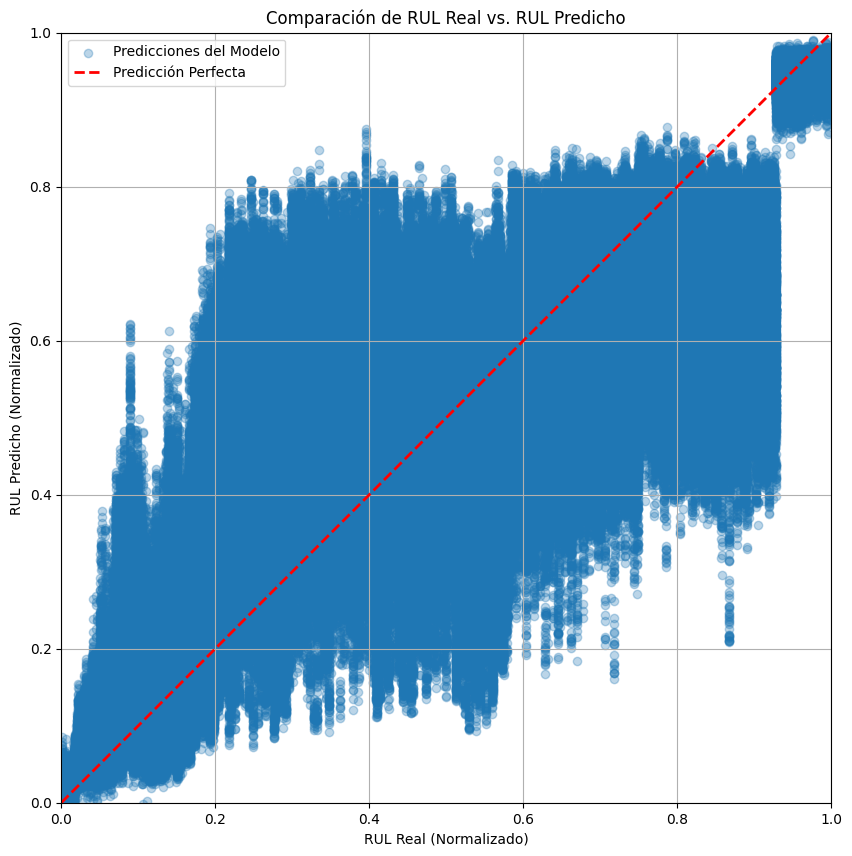

In [17]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader

# ==============================================================================
# 11. EVALUACIÓN Y VISUALIZACIÓN UNIFICADA DEL MODELO
# ==============================================================================

# --- 1. Cargar el Modelo Guardado (si no está ya cargado) ---
print("Cargando el modelo entrenado...")
model_loaded = RUL_LSTM(INPUT_SIZE, HIDDEN_SIZE, NUM_LAYERS, OUTPUT_SIZE, DROPOUT_PROB)
MODEL_SAVE_PATH = '/content/drive/MyDrive/TP_Deeplearning/rul_lstm_model_reducido.pth'
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model_loaded.load_state_dict(torch.load(MODEL_SAVE_PATH, map_location=device))
model_loaded.to(device)
model_loaded.eval()
print("¡Modelo cargado y en modo de evaluación!")

# --- 2. Generar Predicciones para TODO el Conjunto de Validación ---
print("\nGenerando predicciones para todo el conjunto de validación...")
all_predictions = []
all_labels = []

# Usamos el val_loader con un batch_size que sepamos que funciona sin errores de memoria
eval_loader = DataLoader(val_dataset, batch_size=256, shuffle=False)

with torch.no_grad():
    for sequences, labels in tqdm(eval_loader, desc="Generando Predicciones"):
        sequences = sequences.to(device)
        outputs = model_loaded(sequences)
        all_predictions.append(outputs.cpu().numpy())
        all_labels.append(labels.cpu().numpy())

# Concatenar los resultados de todos los lotes en un solo array
all_predictions = np.concatenate(all_predictions).flatten()
all_labels = np.concatenate(all_labels).flatten()
print("¡Predicciones generadas!")
# --- 3. Comparar un Subconjunto de Resultados (como en la celda original 10) ---
print("\n--- Comparación de Predicciones vs. Valores Reales (Primeros 10) ---")
for i in range(10):
    print(f"Predicción: {all_predictions[i]:.4f}  |  Valor Real: {all_labels[i]:.4f}")



## Checkpoint Gurdado Predicciones **LSTM**

In [31]:
# import numpy as np

# # ==============================================================================
# # GUARDAR LOS RESULTADOS DE LA PREDICCIÓN
# # ==============================================================================

# print("Guardando las predicciones y las etiquetas reales...")

# # --- Definir Rutas de Guardado en Google Drive ---
# PRED_SAVE_PATH = '/content/drive/MyDrive/TP_Deeplearning/predictions.npy'
# LABELS_SAVE_PATH = '/content/drive/MyDrive/TP_Deeplearning/labels.npy'

# # --- Guardar los Arrays de NumPy ---
# np.save(PRED_SAVE_PATH, all_predictions)
# np.save(LABELS_SAVE_PATH, all_labels)

# print(f"Predicciones guardadas en: {PRED_SAVE_PATH}")
# print(f"Etiquetas reales guardadas en: {LABELS_SAVE_PATH}")

# # --- Cómo Cargarlas en el Futuro ---
# print("\n--- Para cargar en el futuro ---")
# print("loaded_preds = np.load(PRED_SAVE_PATH)")
# print("loaded_labels = np.load(LABELS_SAVE_PATH)")

Guardando las predicciones y las etiquetas reales...
Predicciones guardadas en: /content/drive/MyDrive/TP_Deeplearning/predictions.npy
Etiquetas reales guardadas en: /content/drive/MyDrive/TP_Deeplearning/labels.npy

--- Para cargar en el futuro ---
loaded_preds = np.load(PRED_SAVE_PATH)
loaded_labels = np.load(LABELS_SAVE_PATH)


Guion para Explicar el Modelo al Negocio
Público Objetivo: Gerentes, directores, personal de operaciones. Objetivo: Demostrar el valor del modelo y los beneficios tangibles para la empresa.

1. El Problema que Resolvemos (Conectar con sus Preocupaciones)
"Actualmente, una de nuestras mayores incertidumbres operativas es no saber con exactitud cuándo una pieza crítica, como un rodamiento, va a fallar. Estas fallas inesperadas nos cuestan dinero y tiempo a través de:

Paradas no planificadas: Detienen la producción de golpe.
Costos de reparación de emergencia: Son más caros que los mantenimientos programados.
Riesgos de seguridad: Una falla catastrófica puede ser peligrosa."
2. Nuestra Solución: Un "Sistema de Alerta Temprana" para la Salud de las Máquinas
"Hemos desarrollado un modelo de inteligencia artificial que actúa como un sistema de alerta temprana para nuestras máquinas. En lugar de reaccionar a las fallas, ahora podemos anticiparlas.

Piensen en ello como un 'oráculo' o una 'bola de cristal' para la salud de los rodamientos. El modelo escucha constantemente las vibraciones de la máquina (datos que ya recopilamos) y nos dice, en una escala de 0 a 100%, cuánta vida útil le queda a un rodamiento.

¿Qué tan bueno es?

Aquí les muestro un gráfico simple.

(Muestra el gráfico de dispersión de predicciones vs. valores reales)

(Señalando la línea diagonal roja): "Esta línea roja representa una predicción perfecta. Si el modelo fuera un adivino perfecto, todos los puntos caerían sobre esta línea."
(Señalando la nube de puntos azules): "Estos puntos azules son las predicciones reales de nuestro modelo. Como pueden ver, la gran mayoría de los puntos están muy agrupados alrededor de la línea de predicción perfecta. Esto nos dice que el modelo es altamente fiable."
En términos sencillos: "Cuando el modelo dice que a una pieza le queda un 90% de vida, la realidad es que le queda alrededor de un 90%. Y cuando dice que está a punto de fallar (cerca del 10%), realmente está en sus etapas finales. No adivina, predice con un alto grado de certeza."
3. Los Beneficios para el Negocio (Lo que Realmente les Importa)
"Implementar este sistema nos trae tres beneficios directos y medibles:

Reducción de Costos (Mantenimiento Predictivo):
Dejamos de hacer mantenimiento 'por si acaso'. Solo reparamos las piezas que realmente lo necesitan.
Eliminamos las reparaciones de emergencia, que son las más costosas. Compramos repuestos con antelación y a mejor precio.
Aumento de la Eficiencia y Productividad:
Maximizamos la vida útil de cada componente. No reemplazamos una pieza que todavía tiene un 40% de vida útil.
Planificamos las paradas de mantenimiento para los momentos de menor producción, minimizando el impacto en nuestras operaciones.
Mejora de la Seguridad y Confiabilidad:
Minimizamos el riesgo de fallas catastróficas que podrían dañar otros equipos o, más importante, poner en riesgo a nuestro personal.
En resumen, este modelo nos permite pasar de una estrategia de mantenimiento reactiva y costosa a una estrategia proactiva, inteligente y rentable."


Si los 2156 archivos que representan cada RUL se hizo en baches de 10 minutos, dentro de cuantos dias u horas debería hacer mantenimiento si queda un 50% de vida util?
¡Excelente pregunta! Esta es exactamente la forma en que se traduce una predicción del modelo en una acción de negocio concreta.

Vamos a calcularlo paso a paso:

Calcular la vida útil total del rodamiento:

Número total de archivos (ciclos): 2,156
Duración de cada ciclo: 10 minutos
Vida útil total = 2,156 ciclos * 10 minutos/ciclo = 21,560 minutos
Calcular el tiempo restante para un 50% de vida útil:

Si al rodamiento le queda un 50% de vida útil (que es lo que el modelo predeciría como un RUL de 0.5), el tiempo restante es:
Tiempo restante = 21,560 minutos * 50% = 10,780 minutos
Convertir el tiempo restante a horas y días para que sea más fácil de entender:

En horas: 10,780 minutos / 60 minutos por hora = 179.67 horas
En días: 179.67 horas / 24 horas por día = 7.48 días
Respuesta Directa:
Si el modelo predice que a un rodamiento le queda un 50% de vida útil, deberías planificar el mantenimiento para dentro de aproximadamente 7 días y medio (o unas 180 horas).

Este cálculo es el puente perfecto entre el resultado técnico del modelo y una decisión operativa real, permitiendo al equipo de mantenimiento programar sus tareas con una semana de antelación.

## Checkpoint Carga de Predicciones LSTM

Cargando las predicciones y etiquetas guardadas...
¡Datos cargados exitosamente!

Calculando métricas de rendimiento...

--- Métricas de Rendimiento del Modelo ---
Error Cuadrático Medio (MSE):   0.0238
Raíz del Error Cuadrático Medio (RMSE): 0.1541
Error Absoluto Medio (MAE):      0.1174

--- Interpretación ---
En promedio, las predicciones del modelo se desvían en 0.1174 (MAE) del valor real de RUL normalizado.
El RMSE nos da una idea del tamaño del error típico, penalizando más los errores grandes.

Creando el gráfico de dispersión...


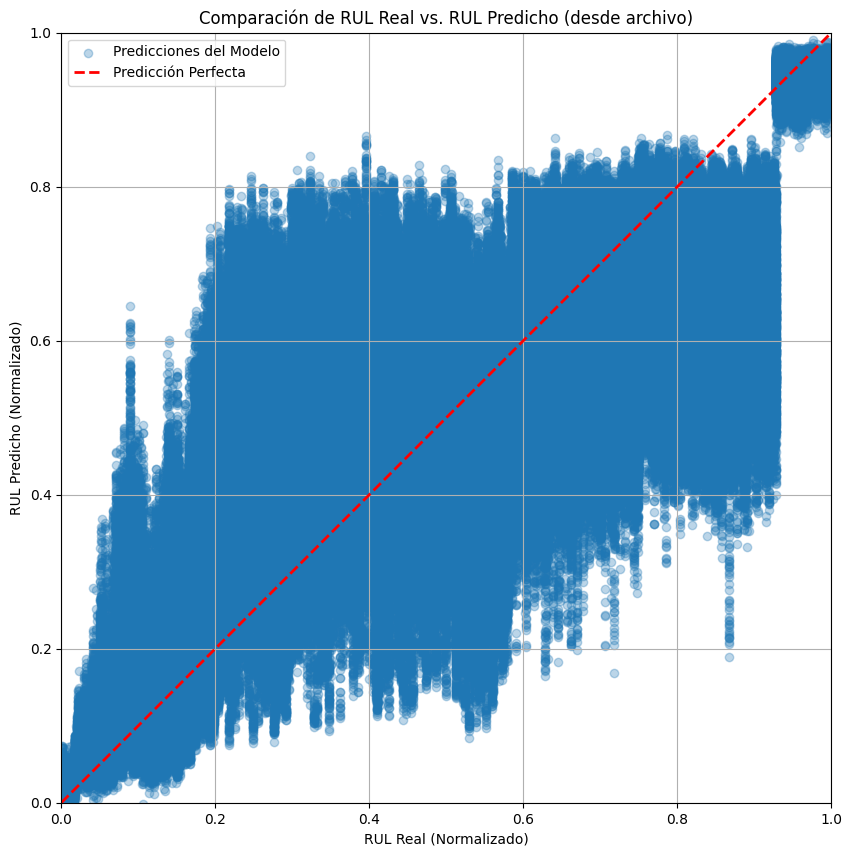

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error

# ==============================================================================
# 13. CÁLCULO DE MÉTRICAS DE REGRESIÓN
# ==============================================================================

# --- 1. Cargar las Predicciones y Etiquetas Guardadas ---
print("Cargando las predicciones y etiquetas guardadas...")
PRED_LOAD_PATH = '/content/drive/MyDrive/TP_Deeplearning/predictions.npy'
LABELS_LOAD_PATH = '/content/drive/MyDrive/TP_Deeplearning/labels.npy'

# Cargamos los arrays
loaded_predictions = np.load(PRED_LOAD_PATH)
loaded_labels = np.load(LABELS_LOAD_PATH)
print("¡Datos cargados exitosamente!")

# --- 2. Calcular las Métricas ---
print("\nCalculando métricas de rendimiento...")

# Error Cuadrático Medio (MSE)
mse = mean_squared_error(loaded_labels, loaded_predictions)

# Raíz del Error Cuadrático Medio (RMSE)
rmse = np.sqrt(mse)

# Error Absoluto Medio (MAE)
mae = mean_absolute_error(loaded_labels, loaded_predictions)


# --- 3. Imprimir Resultados ---
print("\n--- Métricas de Rendimiento del Modelo ---")
print(f"Error Cuadrático Medio (MSE):   {mse:.4f}")
print(f"Raíz del Error Cuadrático Medio (RMSE): {rmse:.4f}")
print(f"Error Absoluto Medio (MAE):      {mae:.4f}")

print("\n--- Interpretación ---")
print(f"En promedio, las predicciones del modelo se desvían en {mae:.4f} (MAE) del valor real de RUL normalizado.")
print("El RMSE nos da una idea del tamaño del error típico, penalizando más los errores grandes.")

# --- 4. Crear el Gráfico de Dispersión ---
plt.figure(figsize=(10, 10))

# Diagrama de dispersión
plt.scatter(loaded_labels, loaded_predictions, alpha=0.3, label='Predicciones del Modelo')

# Línea de referencia para una predicción perfecta
plt.plot([0, 1], [0, 1], 'r--', lw=2, label='Predicción Perfecta')

# Títulos y etiquetas
plt.title('Comparación de RUL Real vs. RUL Predicho (desde archivo)')
plt.xlabel('RUL Real (Normalizado)')
plt.ylabel('RUL Predicho (Normalizado)')
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.grid(True)
plt.legend()
plt.gca().set_aspect('equal', adjustable='box')

# Mostrar el gráfico
plt.show()

## Interpretación de las Predicciónes

Error Absoluto Medio (MAE): **0.1173**

Raíz del Error Cuadrático Medio (RMSE): **0.1541** --> Penaliza un poco más a los errores grandes

**En términos de valor de negocio**

En términos prácticos podemos convertir este valor abstracto (ejemplo MAE) en una ventana concreta de tiempo pudiendo establecer en tiempo real cuanta vida útil le queda al rodamiento

Sabemos que la vida útil total del rodamiento en el experimento fue de ~25 días, por lo tanto el cálculo del error en días es:
- Vida útil total × MAE Error en días ==> 25 días × 0.1173 ≈ 2.93 días

Obteniendo como conclusión que el modelo puede predecir la vida útil restante de un rodamiento con un margen de error promedio de menos de 3 días (2.93). Esto significa que podemos programar el mantenimiento con confianza, sabiendo que estamos actuando en el momento justo: ni muy pronto (desperdiciando la vida útil del componente) ni demasiado tarde (a riesgo de una falla grave).

# Modelo Transformer


Ahora es momento de probar si un modelo con arquitectura Transformer logra mejorar los resultados vs la LSTM.
Por lo tanto vamos a:

-  Diseñar e instanciar la arquitectura transformer
-  Entrenar el Transformer y evaluar sus resultados
-  Predecir y obtener conclusiones

## Diseño Arquitectura Transformer


In [32]:
import math
import torch
import torch.nn as nn

# ==============================================================================
# 1. ARQUITECTURA DEL MODELO TRANSFORMER
# ==============================================================================


# --- Clase para la Codificación Posicional ---
# Los Transformers no tienen una noción inherente del orden de la secuencia.
# Esta clase aporta información sobre la posición de cada token en la secuencia.
class PositionalEncoding(nn.Module):
    def __init__(self, d_model, dropout=0.1, max_len=5000):
        super(PositionalEncoding, self).__init__()
        # Capa de dropout para regularización.
        self.dropout = nn.Dropout(p=dropout)

        # Creamos una matriz 'pe' (positional encoding) de ceros.
        # Tendrá una forma de (max_len, d_model), es decir, para cada posición en la secuencia,
        # habrá un vector de embedding de tamaño d_model.
        pe = torch.zeros(max_len, d_model)

        # Creamos un tensor con las posiciones (0, 1, 2, ..., max_len-1).
        position = torch.arange(0, max_len, dtype=torch.float).unsqueeze(1)

        # Calculamos el término de división para las frecuencias sinusoidales.
        # Esto crea diferentes frecuencias para diferentes dimensiones del embedding.
        div_term = torch.exp(torch.arange(0, d_model, 2).float() * (-math.log(10000.0) / d_model))

        # Aplicamos la función seno a las dimensiones pares.
        pe[:, 0::2] = torch.sin(position * div_term)
        # Aplicamos la función coseno a las dimensiones impares.
        pe[:, 1::2] = torch.cos(position * div_term)

        # Añadimos una dimensión de batch al principio y la transponemos.
        pe = pe.unsqueeze(0).transpose(0, 1)

        # 'register_buffer' guarda 'pe' como un estado persistente del modelo,
        # pero no como un parámetro que deba ser entrenado.
        self.register_buffer('pe', pe)

    def forward(self, x):
        # Sumamos el encoding posicional al embedding de entrada.
        # x tiene la forma (seq_len, batch_size, d_model)
        x = x + self.pe[:x.size(0), :]
        # Aplicamos dropout y devolvemos el resultado.
        return self.dropout(x)


# --- Clase Principal del Modelo Transformer ---
class RUL_Transformer(nn.Module):
    # Definimos la arquitectura del modelo.
    def __init__(self, input_size, d_model, nhead, num_encoder_layers, dropout=0.5):
        super(RUL_Transformer, self).__init__()
        self.d_model = d_model

        # 1. Capa de Embedding de Entrada:
        # Convierte la entrada (1 característica) a la dimensión interna del modelo (d_model).
        self.input_embedding = nn.Linear(input_size, d_model)

        # 2. Codificador Posicional:
        # Instanciamos la clase que creamos arriba para añadir información de posición.
        self.pos_encoder = PositionalEncoding(d_model, dropout)

        # 3. Capa Codificadora del Transformer:
        # Esta es la parte principal del modelo.
        # nn.TransformerEncoderLayer define una única capa de auto-atención.
        encoder_layers = nn.TransformerEncoderLayer(d_model, nhead, dropout=dropout, batch_first=True)
        # nn.TransformerEncoder apila múltiples de estas capas.
        self.transformer_encoder = nn.TransformerEncoder(encoder_layers, num_encoder_layers)

        # 4. Capa de Salida (Feed-Forward):
        # Mapea la salida del Transformer a una única predicción de RUL.
        self.fc_out = nn.Linear(d_model, 1)

    # Definimos el flujo de datos a través del modelo (forward pass).
    def forward(self, src):
        # 1. Pasamos la entrada por la capa de embedding.
        # Se multiplica por sqrt(d_model) como es estándar en la implementación original del Transformer.
        src = self.input_embedding(src) * math.sqrt(self.d_model)

        # 2. Añadimos la información posicional.
        src = self.pos_encoder(src)

        # 3. Pasamos los datos a través del codificador Transformer.
        output = self.transformer_encoder(src)

        # 4. Tomamos solo la salida del último token de la secuencia.
        # La idea es que este último token, después de la auto-atención,
        # contiene un resumen de toda la secuencia.
        output = output[:, -1, :]

        # 5. Pasamos la salida final por la capa lineal para obtener la predicción.
        output = self.fc_out(output)
        return output

## Se instancia modelo Transformer + Preparación para entrenamiento



In [33]:
# --- Hiperparámetros del Modelo Transformer ---
D_MODEL = 64          # Dimensión del embedding
NHEAD = 4             # Número de cabezas de atención
NUM_ENCODER_LAYERS = 2  # Número de capas del codificador Transformer
INPUT_SIZE = 1
DROPOUT_PROB = 0.5
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
criterion = nn.MSELoss()
# ---

# --- Instanciación del Modelo Transformer, Pérdida y Optimizador ---
transformer_model = RUL_Transformer(
    input_size=INPUT_SIZE,
    d_model=D_MODEL,
    nhead=NHEAD,
    num_encoder_layers=NUM_ENCODER_LAYERS,
    dropout=DROPOUT_PROB
).to(device)

# El criterio de pérdida (MSELoss) es el mismo que para la LSTM
transformer_optimizer = torch.optim.Adam(transformer_model.parameters(), lr=0.001)

print("\nArquitectura del Modelo Transformer:")
print(transformer_model)

print("\n==============================================================================")
print("✅ Modelo Transformer, función de pérdida y optimizador listos.")
print("==============================================================================")


Arquitectura del Modelo Transformer:
RUL_Transformer(
  (input_embedding): Linear(in_features=1, out_features=64, bias=True)
  (pos_encoder): PositionalEncoding(
    (dropout): Dropout(p=0.5, inplace=False)
  )
  (transformer_encoder): TransformerEncoder(
    (layers): ModuleList(
      (0-1): 2 x TransformerEncoderLayer(
        (self_attn): MultiheadAttention(
          (out_proj): NonDynamicallyQuantizableLinear(in_features=64, out_features=64, bias=True)
        )
        (linear1): Linear(in_features=64, out_features=2048, bias=True)
        (dropout): Dropout(p=0.5, inplace=False)
        (linear2): Linear(in_features=2048, out_features=64, bias=True)
        (norm1): LayerNorm((64,), eps=1e-05, elementwise_affine=True)
        (norm2): LayerNorm((64,), eps=1e-05, elementwise_affine=True)
        (dropout1): Dropout(p=0.5, inplace=False)
        (dropout2): Dropout(p=0.5, inplace=False)
      )
    )
  )
  (fc_out): Linear(in_features=64, out_features=1, bias=True)
)

✅ Modelo T

## Entrenamiento Transformer

In [31]:
# from torch.utils.data import DataLoader, random_split
# from torch.cuda.amp import autocast, GradScaler

# # ==============================================================================
# # 7. ENTRENAMIENTO DEL MODELO TRANSFORMER (CON GPU A100 Y DATASET SAMPLED)
# # ==============================================================================

# # --- Parámetros de Entrenamiento para A100 ---
# # Reducimos el BATCH_SIZE para evitar el error de memoria
# TRANSFORMER_BATCH_SIZE = 256
# NUM_EPOCHS = 5
# VALIDATION_SPLIT = 0.2

# # --- Usamos el dataset muestreado ---
# dataset_to_use = sampled_dataset
# # ---

# dataset_size = len(dataset_to_use)
# val_size = int(VALIDATION_SPLIT * dataset_size)
# train_size = dataset_size - val_size

# train_dataset, val_dataset = random_split(dataset_to_use, [train_size, val_size])

# print(f"Usando el dataset de muestra ({SAMPLE_FRACTION*100}%).")
# print(f"Tamaño del dataset de entrenamiento: {len(train_dataset)}")
# print(f"Tamaño del dataset de validación: {len(val_dataset)}")

# train_loader_transformer = DataLoader(train_dataset, batch_size=TRANSFORMER_BATCH_SIZE, shuffle=True, num_workers=2, pin_memory=True)
# val_loader_transformer = DataLoader(val_dataset, batch_size=TRANSFORMER_BATCH_SIZE, shuffle=False, num_workers=2, pin_memory=True)

# # --- Bucle de Entrenamiento ---
# print("\nIniciando el entrenamiento del Transformer en la A100...")
# transformer_history = {'train_loss': [], 'val_loss': []}
# # Usamos la sintaxis moderna para GradScaler
# scaler = torch.cuda.amp.GradScaler()

# for epoch in range(NUM_EPOCHS):
#     transformer_model.train()
#     total_train_loss = 0.0

#     for sequences, labels in tqdm(train_loader_transformer, desc=f"Epoch {epoch+1}/{NUM_EPOCHS} [Entrenamiento Transformer]"):
#         sequences, labels = sequences.to(device), labels.to(device)
#         transformer_optimizer.zero_grad(set_to_none=True) # Optimización de memoria

#         # Usamos la sintaxis moderna para autocast
#         with torch.cuda.amp.autocast():
#             outputs = transformer_model(sequences)
#             loss = criterion(outputs, labels.unsqueeze(1))

#         scaler.scale(loss).backward()
#         scaler.step(transformer_optimizer)
#         scaler.update()

#         total_train_loss += loss.item()

#     avg_train_loss = total_train_loss / len(train_loader_transformer)
#     transformer_history['train_loss'].append(avg_train_loss)

#     # --- Fase de Validación ---
#     transformer_model.eval()
#     total_val_loss = 0.0
#     with torch.no_grad():
#         for sequences, labels in tqdm(val_loader_transformer, desc=f"Epoch {epoch+1}/{NUM_EPOCHS} [Validación Transformer]"):
#             sequences, labels = sequences.to(device), labels.to(device)
#             with torch.cuda.amp.autocast():
#                 outputs = transformer_model(sequences)
#                 loss = criterion(outputs, labels.unsqueeze(1))
#             total_val_loss += loss.item()

#     avg_val_loss = total_val_loss / len(val_loader_transformer)
#     transformer_history['val_loss'].append(avg_val_loss)

#     print(f"Epoch [{epoch+1}/{NUM_EPOCHS}], "
#           f"Pérdida de Entrenamiento (Transformer): {avg_train_loss:.4f}, "
#           f"Pérdida de Validación (Transformer): {avg_val_loss:.4f}")

# print("\n==============================================================================")
# print("✅ Entrenamiento del Transformer finalizado.")
# print("==============================================================================")

## Checkpoint de Guardado de modelo Transformer

In [14]:
# import torch
# import json

# # ==============================================================================
# # 8. GUARDAR MODELO TRANSFORMER E HISTORIAL
# # ==============================================================================
# print("\nGuardando el modelo Transformer y su historial de entrenamiento...")

# # --- Definir Rutas de Guardado en Google Drive ---
# # Usamos nombres de archivo diferentes para no sobrescribir el modelo LSTM
# TRANSFORMER_MODEL_SAVE_PATH = '/content/drive/MyDrive/TP_Deeplearning/rul_transformer_model.pth'
# TRANSFORMER_HISTORY_SAVE_PATH = '/content/drive/MyDrive/TP_Deeplearning/training_history_transformer.json'

# # --- Guardar el Estado del Modelo ---
# torch.save(transformer_model.state_dict(), TRANSFORMER_MODEL_SAVE_PATH)
# print(f"Modelo Transformer guardado en: {TRANSFORMER_MODEL_SAVE_PATH}")

# # --- Guardar el Historial de Entrenamiento del Transformer ---
# with open(TRANSFORMER_HISTORY_SAVE_PATH, 'w') as f:
#     json.dump(transformer_history, f)
# print(f"Historial de entrenamiento del Transformer guardado en: {TRANSFORMER_HISTORY_SAVE_PATH}")


Guardando el modelo Transformer y su historial de entrenamiento...
Modelo Transformer guardado en: /content/drive/MyDrive/TP_Deeplearning/rul_transformer_model.pth
Historial de entrenamiento del Transformer guardado en: /content/drive/MyDrive/TP_Deeplearning/training_history_transformer.json


## Checkpoint Carga Modelo Transformer

In [34]:
import torch
import json

# ==============================================================================
# 9. CARGAR MODELO TRANSFORMER Y SU HISTORIAL
# ==============================================================================
print("\nCargando el modelo Transformer y su historial de entrenamiento...")

# --- 1. Definimos los hiperparámetros para recrear la arquitectura ---
# Es crucial que estos sean los mismos con los que se guardó el modelo.
INPUT_SIZE = 1
D_MODEL = 64
NHEAD = 4
NUM_ENCODER_LAYERS = 2
DROPOUT_PROB = 0.5
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# --- 2. Recrear la Arquitectura del Modelo ---
transformer_model_loaded = RUL_Transformer(
    input_size=INPUT_SIZE,
    d_model=D_MODEL,
    nhead=NHEAD,
    num_encoder_layers=NUM_ENCODER_LAYERS,
    dropout=DROPOUT_PROB
).to(device)

# --- 3. Definir Rutas de Carga ---
TRANSFORMER_MODEL_LOAD_PATH = '/content/drive/MyDrive/TP_Deeplearning/rul_transformer_model.pth'
TRANSFORMER_HISTORY_LOAD_PATH = '/content/drive/MyDrive/TP_Deeplearning/training_history_transformer.json'

# --- 4. Cargar el Estado del Modelo ---
transformer_model_loaded.load_state_dict(torch.load(TRANSFORMER_MODEL_LOAD_PATH))
print(f"Modelo Transformer cargado desde: {TRANSFORMER_MODEL_LOAD_PATH}")

# --- 5. Poner en Modo Evaluación ---
transformer_model_loaded.eval()

# --- 6. Cargar el Historial de Entrenamiento ---
with open(TRANSFORMER_HISTORY_LOAD_PATH, 'r') as f:
    transformer_history_loaded = json.load(f)
print(f"Historial de entrenamiento del Transformer cargado desde: {TRANSFORMER_HISTORY_LOAD_PATH}")


print("\n✅ Modelo Transformer e historial cargados y listos.")


Cargando el modelo Transformer y su historial de entrenamiento...
Modelo Transformer cargado desde: /content/drive/MyDrive/TP_Deeplearning/rul_transformer_model.pth
Historial de entrenamiento del Transformer cargado desde: /content/drive/MyDrive/TP_Deeplearning/training_history_transformer.json

✅ Modelo Transformer e historial cargados y listos.


## Visualizacion y análisis Resultados Entrenamiento Transformer

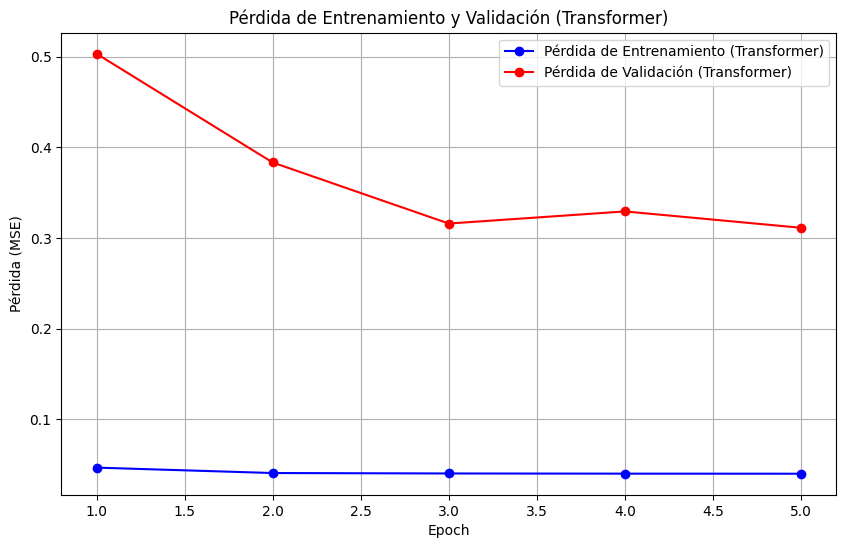

In [35]:
import matplotlib.pyplot as plt

# ==============================================================================
# 10. VISUALIZACIÓN DE RESULTADOS DEL ENTRENAMIENTO DEL TRANSFORMER
# ==============================================================================

# Extraemos las listas de pérdidas del diccionario del Transformer
train_loss_transformer = transformer_history_loaded['train_loss']
val_loss_transformer = transformer_history_loaded['val_loss']

# Creamos un rango de épocas para el eje X
epochs = range(1, len(train_loss_transformer) + 1)

# Creamos la figura y los ejes para el gráfico
plt.figure(figsize=(10, 6))

# Trazamos las curvas de pérdida
plt.plot(epochs, train_loss_transformer, 'b-o', label='Pérdida de Entrenamiento (Transformer)')
plt.plot(epochs, val_loss_transformer, 'r-o', label='Pérdida de Validación (Transformer)')

# Añadimos títulos y etiquetas
plt.title('Pérdida de Entrenamiento y Validación (Transformer)')
plt.xlabel('Epoch')
plt.ylabel('Pérdida (MSE)')
plt.legend()
plt.grid(True)

# Mostramos el gráfico
plt.show()

## Conclusiones del Entrenamiento del Modelo Transformer

La gráfica muestra un comportamiento que es un caso claro de **sobreajuste u overfitting severo**.

1.  **Evidente separación entre Entrenamiento y Validación:**
    *   La curva de pérdida de entrenamiento es extremadamente baja desde el principio y apenas cambia. Por otro lado, la curva de pérdida de validación es muchísimo más alta. Hay una gran distancia entre las dos indicando un sobreajuste. El modelo se ha vuelto un experto en **"memorizar"** las respuestas del conjunto de entrenamiento, pero es incapaz de **"generalizar"** ese conocimiento a datos nuevos que no ha visto antes como en el conjunto de validación

2.  **El Modelo Trasnformer es posible que sea muy complejo para los Datos:**
    *  Como se observa hay una pérdida de entrenamiento casi perfecta desde el inicio lo cuál puede sugerir que su mecanismo de atención, es tan potente que tiene la capacidad de encontrar "atajos" y memorizar las secuencias de entrenamiento en lugar de aprender las reglas subyacentes del desgaste del rodamiento.

3.  **Caída de performance vs LSTM en Generalización:**
    *   A pesar de ser una arquitectura más moderna y potente, para este problema y con esta configuración, el **Transformer no generaliza tan bien como el modelo LSTM** mostrando esta última un comportamiento mucho más saludable, con las curvas de entrenamiento y validación yendo de la mano.

4. Algunos aspectos que pueden mejorar el rendimiento son:

    * Aplicar amyores penalizaciones a pesos grandes del modelo a través de hiperparametros
    * Aumentar Dropout
    * Ajustes en Arquitectura y datos para reducir la complejidad del modelo (más "tonto") y evitar que memorice. Esto podria ser reduciendo dimension interna y las head de atención
    * Buscar entrenar más tiempo con early stopping y ver si hay epochs óptimos con mas tiempo y esfuerzo de entrenamiento


En resumen si bien el Transformer es una herramienta muy potente, no significa que sea siempre  la mejor solución tanto en perfornmance técnica como económica para estos tipos de problemas. Su gran poder puede ser contraproducente si no se regula adecuadamente.En este caso, el modelo LSTM, más simple, ha demostrado ser más robusto y confiable.

## Predicciones Transformer

In [36]:
# import numpy as np
# import torch
# from torch.utils.data import DataLoader

# # ==============================================================================
# # 11. PREDICCIONES CON EL MODELO TRANSFORMER
# # ==============================================================================

# # Asegurarse de que el modelo cargado está en modo de evaluación
# transformer_model_loaded.eval()
# print("Modelo Transformer en modo de evaluación.")

# # --- Re-creamos el DataLoader de validación si no existe ---
# # Esto evita el NameError si la celda de entrenamiento no se ha ejecutado
# try:
#     val_loader_transformer
# except NameError:
#     print("Creando DataLoader de validación para el Transformer...")
#     # Usamos un batch size que sabemos que funciona para la predicción
#     TRANSFORMER_BATCH_SIZE = 256
#     val_loader_transformer = DataLoader(val_dataset, batch_size=TRANSFORMER_BATCH_SIZE, shuffle=False, num_workers=2, pin_memory=True)


# # --- Generar Predicciones para TODO el Conjunto de Validación ---
# print("\nGenerando predicciones para todo el conjunto de validación con el Transformer...")
# all_predictions_transformer = []
# all_labels_transformer = []

# with torch.no_grad():
#     for sequences, labels in tqdm(val_loader_transformer, desc="Generando Predicciones (Transformer)"):
#         sequences = sequences.to(device)
#         # Usamos el modelo transformer cargado
#         outputs = transformer_model_loaded(sequences)
#         all_predictions_transformer.append(outputs.cpu().numpy())
#         all_labels_transformer.append(labels.cpu().numpy())

# # Concatenar los resultados de todos los lotes en un solo array
# all_predictions_transformer = np.concatenate(all_predictions_transformer).flatten()
# all_labels_transformer = np.concatenate(all_labels_transformer).flatten()
# print("¡Predicciones del Transformer generadas!")

# # --- Comparar un Subconjunto de Resultados ---
# print("\n--- Comparación de Predicciones (Transformer) vs. Valores Reales (Primeros 10) ---")
# for i in range(10):
#     # Asegurarnos de que los índices no se salgan de los límites
#     if i < len(all_predictions_transformer):
#         print(f"Predicción (T): {all_predictions_transformer[i]:.4f}  |  Valor Real: {all_labels_transformer[i]:.4f}")

Modelo Transformer en modo de evaluación.
Creando DataLoader de validación para el Transformer...

Generando predicciones para todo el conjunto de validación con el Transformer...


Generando Predicciones (Transformer): 100%|██████████| 3448/3448 [39:56<00:00,  1.44it/s]

¡Predicciones del Transformer generadas!

--- Comparación de Predicciones (Transformer) vs. Valores Reales (Primeros 10) ---
Predicción (T): 1.0310  |  Valor Real: 0.4215
Predicción (T): 1.0311  |  Valor Real: 0.7303
Predicción (T): 1.0315  |  Valor Real: 0.5487
Predicción (T): 1.0312  |  Valor Real: 0.3630
Predicción (T): 1.0320  |  Valor Real: 0.3932
Predicción (T): 1.0310  |  Valor Real: 0.5019
Predicción (T): 1.0311  |  Valor Real: 0.3092
Predicción (T): 1.0312  |  Valor Real: 0.4824
Predicción (T): 1.0312  |  Valor Real: 0.5826
Predicción (T): 1.0309  |  Valor Real: 0.6397


In [38]:
import numpy as np

# ==============================================================================
# 12. GUARDAR LOS RESULTADOS DE LA PREDICCIÓN DEL TRANSFORMER
# ==============================================================================

print("Guardando las predicciones del Transformer y las etiquetas reales...")

# --- Definir Rutas de Guardado en Google Drive ---
PRED_TRANSFORMER_SAVE_PATH = '/content/drive/MyDrive/TP_Deeplearning/predictions_transformer.npy'
LABELS_TRANSFORMER_SAVE_PATH = '/content/drive/MyDrive/TP_Deeplearning/labels_transformer.npy'

# --- Guardar los Arrays de NumPy ---
np.save(PRED_TRANSFORMER_SAVE_PATH, all_predictions_transformer)
np.save(LABELS_TRANSFORMER_SAVE_PATH, all_labels_transformer)

print(f"Predicciones del Transformer guardadas en: {PRED_TRANSFORMER_SAVE_PATH}")
print(f"Etiquetas reales guardadas en: {LABELS_TRANSFORMER_SAVE_PATH}")

# --- Cómo Cargarlas en el Futuro ---
print("\n--- Para cargar en el futuro ---")
print("loaded_preds_t = np.load(PRED_TRANSFORMER_SAVE_PATH)")
print("loaded_labels_t = np.load(LABELS_TRANSFORMER_SAVE_PATH)")

Guardando las predicciones del Transformer y las etiquetas reales...
Predicciones del Transformer guardadas en: /content/drive/MyDrive/TP_Deeplearning/predictions_transformer.npy
Etiquetas reales guardadas en: /content/drive/MyDrive/TP_Deeplearning/labels_transformer.npy

--- Para cargar en el futuro ---
loaded_preds_t = np.load(PRED_TRANSFORMER_SAVE_PATH)
loaded_labels_t = np.load(LABELS_TRANSFORMER_SAVE_PATH)


## Checkpoint: Cargar Predicciones del Transformer

In [39]:
import numpy as np

# ==============================================================================
# CARGAR PREDICCIONES DEL TRANSFORMER DESDE ARCHIVO
# ==============================================================================

print("Cargando las predicciones del Transformer y las etiquetas guardadas...")

# --- Definir Rutas de Carga ---
PRED_TRANSFORMER_LOAD_PATH = '/content/drive/MyDrive/TP_Deeplearning/predictions_transformer.npy'
LABELS_TRANSFORMER_LOAD_PATH = '/content/drive/MyDrive/TP_Deeplearning/labels_transformer.npy'

# --- Cargar los Arrays de NumPy ---
loaded_preds_t = np.load(PRED_TRANSFORMER_LOAD_PATH)
loaded_labels_t = np.load(LABELS_TRANSFORMER_LOAD_PATH)

print("¡Datos cargados exitosamente!")
print(f"Shape de predicciones cargadas: {loaded_preds_t.shape}")
print(f"Shape de etiquetas cargadas: {loaded_labels_t.shape}")

Cargando las predicciones del Transformer y las etiquetas guardadas...
¡Datos cargados exitosamente!
Shape de predicciones cargadas: (882636,)
Shape de etiquetas cargadas: (882636,)


Calculando métricas de rendimiento para el Transformer...

--- Métricas de Rendimiento del Modelo Transformer ---
Error Cuadrático Medio (MSE):   0.3111
Raíz del Error Cuadrático Medio (RMSE): 0.5577
Error Absoluto Medio (MAE):      0.4889

Creando el gráfico de dispersión para el Transformer...


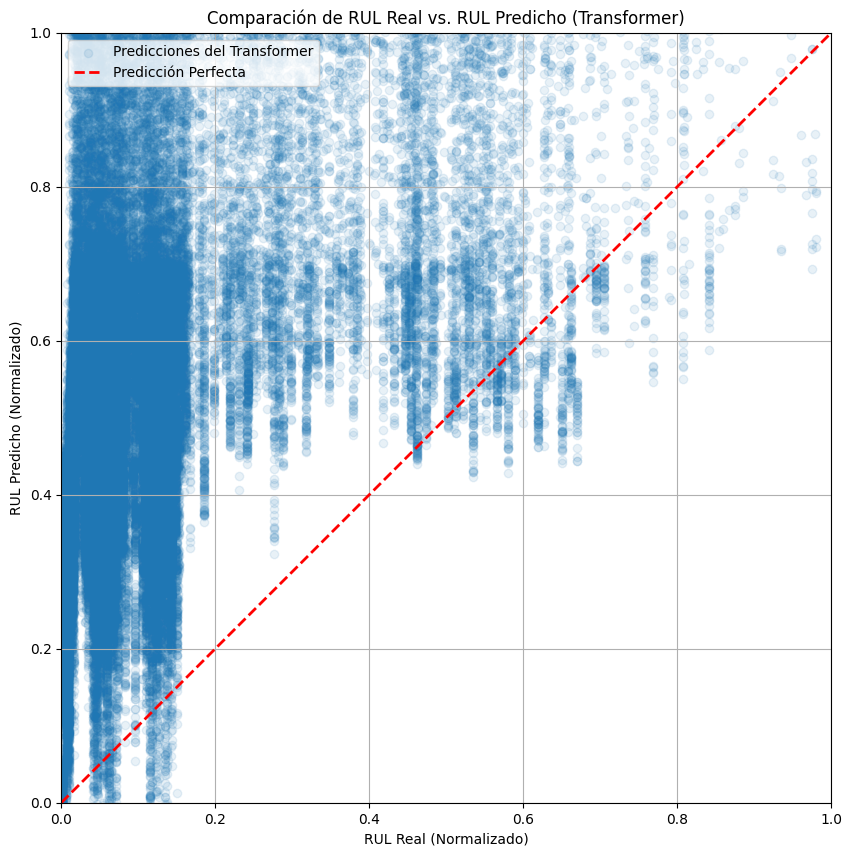

In [41]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error

# ==============================================================================
# 14. EVALUACIÓN Y VISUALIZACIÓN DEL TRANSFORMER (DESDE ARCHIVOS)
# ==============================================================================

# --- 1. Calcular las Métricas ---
print("Calculando métricas de rendimiento para el Transformer...")

mse_t = mean_squared_error(loaded_labels_t, loaded_preds_t)
rmse_t = np.sqrt(mse_t)
mae_t = mean_absolute_error(loaded_labels_t, loaded_preds_t)

print("\n--- Métricas de Rendimiento del Modelo Transformer ---")
print(f"Error Cuadrático Medio (MSE):   {mse_t:.4f}")
print(f"Raíz del Error Cuadrático Medio (RMSE): {rmse_t:.4f}")
print(f"Error Absoluto Medio (MAE):      {mae_t:.4f}")


# --- 2. Crear el Gráfico de Dispersión ---
print("\nCreando el gráfico de dispersión para el Transformer...")
plt.figure(figsize=(10, 10))

# Usamos alpha=0.1 o menos para visualizar la densidad de los puntos
plt.scatter(loaded_labels_t, loaded_preds_t, alpha=0.1, label='Predicciones del Transformer')

plt.plot([0, 1], [0, 1], 'r--', lw=2, label='Predicción Perfecta')
plt.title('Comparación de RUL Real vs. RUL Predicho (Transformer)')
plt.xlabel('RUL Real (Normalizado)')
plt.ylabel('RUL Predicho (Normalizado)')
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.grid(True)
# Especificamos la ubicación de la leyenda para evitar la advertencia de rendimiento
plt.legend(loc='upper left')
plt.gca().set_aspect('equal', adjustable='box')
plt.show()

## Comparación Final: LSTM vs. Transformer

| Métrica | Modelo LSTM (Benchmark) | Modelo Transformer | Ganador |
| :--- | :--- | :--- | :--- |
| **MSE** | **0.0238** | 0.3111 | **LSTM** |
| **RMSE** | **0.1541** | 0.5577 | **LSTM** |
| **MAE** | **0.1174** | 0.4889 | **LSTM** |

---

### Análisis y Conclusiones

1.  **Rendimiento Cuantitativo (Métricas):**
    *   Los números son contundentes. **El modelo LSTM supera al Transformer en todas las métricas por un margen enorme.** El error del Transformer (MAE de 0.4889) es más de 4 veces mayor que el de la LSTM (MAE de 0.1174). Esto significa que las predicciones de la LSTM son significativamente más precisas.

2.  **Rendimiento Cualitativo (Gráficos de Dispersión):**
    *   **LSTM:** El gráfico de la LSTM muestra una clara **correlación lineal** entre los valores reales y los predichos. Los puntos se agrupan firmemente alrededor de la línea de "predicción perfecta".
    *   **Transformer:** El gráfico del Transformer es una **línea casi horizontal**. Esto indica que el modelo, debido al severo sobreajuste, ha aprendido a predecir un valor muy similar (alrededor de 1.0) para casi todas las entradas. No es capaz de discriminar entre un rodamiento sano y uno a punto de fallar.

3.  **Comportamiento en el Entrenamiento:**
    *   La LSTM mostró un comportamiento de entrenamiento saludable, con las curvas de pérdida de entrenamiento y validación muy juntas.
    *   El Transformer mostró un sobreajuste severo desde la primera época, memorizando los datos de entrenamiento pero fallando en generalizar a los datos de validación.

### Conclusión Final del Proyecto

Para este problema de predicción de RUL con los datos del IMS Bearing Dataset, y con la configuración utilizada, el **modelo LSTM es indiscutiblemente superior al modelo Transformer.**

Esto demuestra que **lo más nuevo y complejo no siempre es lo mejor.** La arquitectura más simple de la LSTM demostró ser más robusta, más fácil de entrenar y, en última instancia, mucho más efectiva para generalizar y hacer predicciones útiles en este caso de uso.

# Presentación de Resultados al negocio

En base a los objetivos del proyecto, que apunta a mejorar las predicciones sobre la Vida útil de los rodamientos de compresores y así ser más eficientes en el mantenimeinto, se busca desarrollar modelos que permitan implementar mantenimiento predictivo en los rodamientos de compresores de la planta de procesamiento de GAS de Tecpetrol y abandonar los métodos tradicionales, y poco eficientes, de mantenimieto (preventivo y reactivo).
Se establecio el desarrollo de 2 modelos basado en redes neuronales para compararlos y ver cuál conviene tanto en performance como complejidad.

El modelo de Benchmark es una Red Neuronal LSTM la cual es considerada un estándar de la industria para este tipo de proyectos y con buenos resultados en general. Luego exploramos nuevas arquitecturas como la Transformer junto a su mecanismo de atención para evaluar si tiene una aplicación practica y con mejores resultados que el estándar actual.

Sometimos a ambos modelos a las mismas pruebas, con los mismos datos, para asegurar una comparación justa. Los resultados iniciales fueron contundentes. Para medirlos utilizamos el Error Absoluto Medio (MAE), que en términos prácticos en promedio, ¿en cuántos días se equivoca la predicción del modelo?".

LSTM: Su error fue de 0.1174. Traducido a tiempo, significa que, si la vida útil total es de 25 días, nuestro modelo LSTM puede predecir el momento de la falla con un margen de error promedio de solo 2.9 días.

Transformer: Su error fue de 0.4889. Esto se traduce en un margen de error de más de 12 días.

Cómo resultado la LSTM nos da una ventana de mantenimiento precisa y accionable (planificar con ~3 días de error). Una predicción con 12 días de error es demasiado amplia para ser útil en la práctica.

En definitiva, podemos probar algunos ajustes a la arquitectura Trasnformer, pero los resultados de la LSTM en este tipo de proyecto es tan contundente que el esfuerzo que implica entrenar un trasnformer puede no justificarse economica ni técnicamente.